<a href="https://colab.research.google.com/github/Land-dev/finalProject163/blob/main/163FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ai2thor
!pip install opencv-python pycocotools matplotlib onnxruntime onnx
!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install open_clip_torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 105.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.2/182.2 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 118.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 128.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.1 MB/s eta 0:00:00
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-aga_m3ah
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-aga_m3ah
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=

In [4]:
!apt-get update
!apt-get install -y xvfb

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://cli.github.com/packages stable InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,151 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,832 kB]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,532 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:13 https://ppa.launchpadcontent.net/graphics-drivers

In [12]:
import os
import subprocess
import time

# Start Xvfb (X Virtual Framebuffer) running on display :1
# This creates a "virtual monitor" for AI2-THOR to draw on.
xvfb_process = subprocess.Popen(
    ["Xvfb", ":1", "-screen", "0", "1024x768x24", "+extension", "GLX", "+render"],
    stdout=subprocess.DEVNULL,
    stderr=subprocess.DEVNULL
)

# Set the environment variable so AI2-THOR knows where to look
os.environ["DISPLAY"] = ":1"

# Give it a second to start up
time.sleep(2)

# --- NOW run your original code ---
from ai2thor.controller import Controller

controller = Controller(
    agentMode="locobot",
    visibilityDistance=1.5,
    scene="FloorPlan_Train1_3",
    gridSize=0.25,
    movementGaussianSigma=0.005,
    rotateStepDegrees=90,
    rotateGaussianSigma=0.5,
    renderDepthImage=True,
    renderInstanceSegmentation=True,
    width=300,
    height=300,
    fieldOfView=60
)
print("Controller started successfully!")

Controller started successfully!


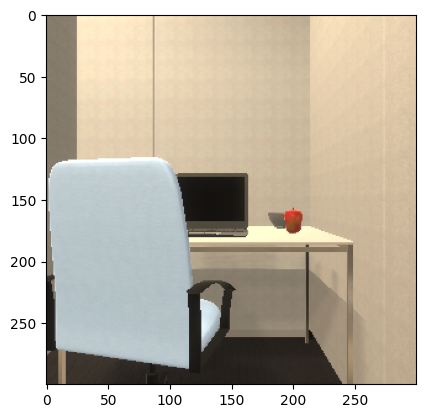

In [13]:
# Visualize the room
import matplotlib.pyplot as plt
frame = controller.last_event.frame

plt.imshow(frame)
plt.axis('on')
plt.show()

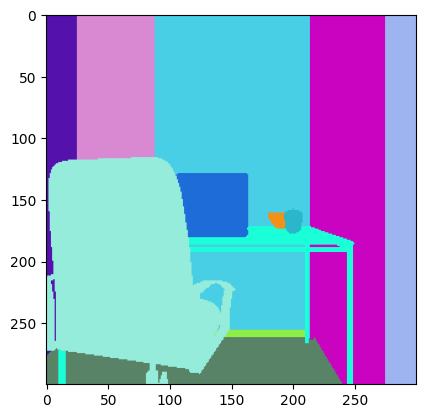

In [14]:
# Show segmentation
seg_frame = controller.last_event.instance_segmentation_frame

plt.imshow(seg_frame)
plt.axis('on')
plt.show()